In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [15]:
#Read initial data
file_path='seattle-weather.csv'
df = pd.read_csv("seattle-weather.csv",index_col="date",parse_dates=True)
print(df.head())
df_temp = df["temp_max"]

            precipitation  temp_max  temp_min  wind  weather
date                                                        
2012-01-01            0.0      12.8       5.0   4.7  drizzle
2012-01-02           10.9      10.6       2.8   4.5     rain
2012-01-03            0.8      11.7       7.2   2.3     rain
2012-01-04           20.3      12.2       5.6   4.7     rain
2012-01-05            1.3       8.9       2.8   6.1     rain


## Exploracion de datos

<AxesSubplot: xlabel='date', ylabel='temp_max'>

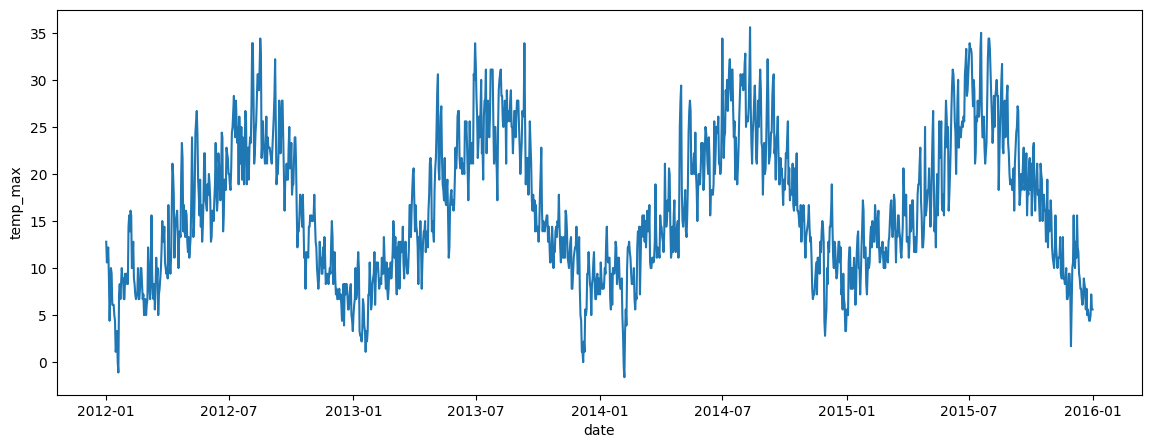

In [16]:
plt.figure(figsize=(14,5))
sns.lineplot(df_temp)

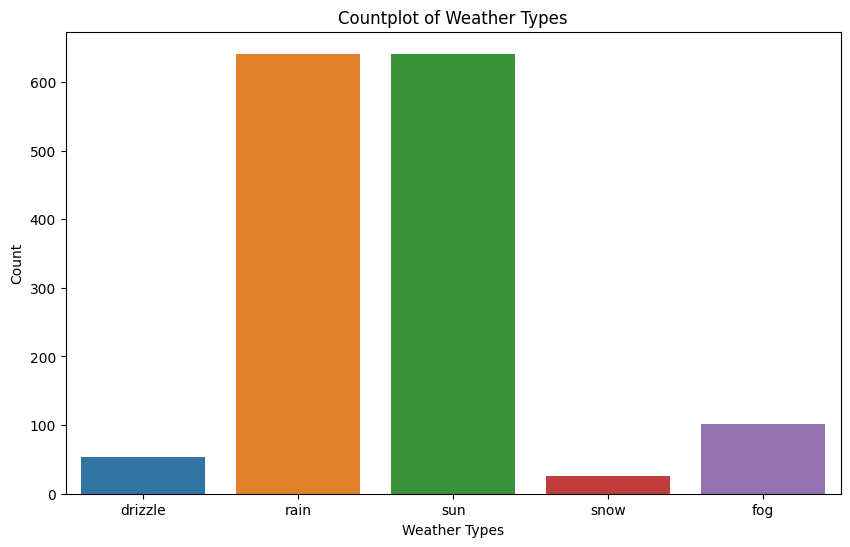

In [21]:
# Create a countplot for the 'weather' column
plt.figure(figsize=(10, 6))
sns.countplot(x='weather', data=df)
plt.title('Countplot of Weather Types')
plt.xlabel('Weather Types')
plt.ylabel('Count')
plt.show()

<AxesSubplot: xlabel='wind', ylabel='Count'>

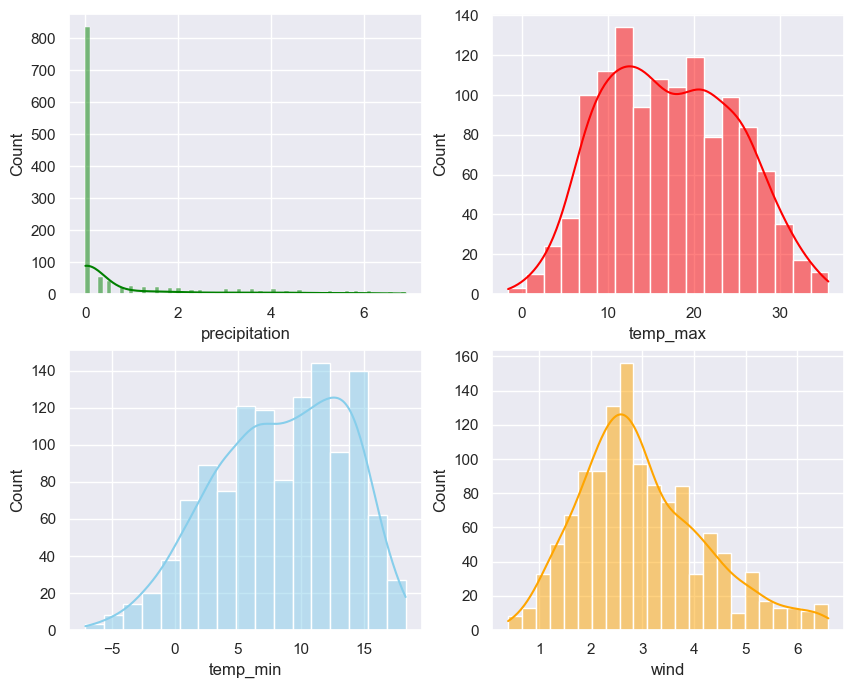

In [24]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=df,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=df,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=df,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=df,x="wind",kde=True,ax=axs[1,1],color='orange')

In [22]:
df[["precipitation","temp_max","temp_min","wind"]].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [23]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [17]:


def df_to_XY(df, window_size=10, test_size=0.2, validation_size=0.1, random_state=42):
    df_np = df.to_numpy()

    # Create input-output pairs
    X = []
    y = []
    for i in range(len(df_np) - window_size):
        row = [[a] for a in df_np[i:i + window_size]]
        X.append(row)
        target = df_np[i + window_size]
        y.append(target)

    X = np.array(X)
    y = np.array(y)

    # Split the data into training, validation, and testing sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(test_size + validation_size), random_state=random_state)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(validation_size / (test_size + validation_size)), random_state=random_state)

    return X_train, X_val, X_test, y_train, y_val, y_test


In [18]:
window_size = 10
X_train,X_val,X_test,y_train,y_val,y_test = df_to_XY(df,window_size=window_size,test_size=0.2,random_state=42)